# <b></span><font style="font-family:cambria"><font style="font-size:50px"><span style='color:#002060'>4. Code & Visualization</b>

# <b>1 <span style='color:#4285f4'>|</span><font style="font-family:cambria"> Importing Python Libraries</b>
- **For Data Manipulation**: numpy, pandas, sklearn
- **For Data Visualization**: matplotlib, seaborn, plotly
- **For ML Models**: Tensorflow, keras

In [1]:
import warnings
import pandas as pd
import seaborn as sea
import plotly.express as px
import matplotlib.pyplot as pylt
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error,r2_score,mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
warnings.filterwarnings('ignore')

# <b>2 <span style='color:#4285f4'>|</span><font style="font-family:cambria"> Reading the Dataset (CSV File)</b>

In [2]:
df = pd.read_csv(r'C:/Users/KIIT/Desktop/KALINGA/ASSIGNMENTS/6) Big Data (BD)/Project/dataset/Life_Expectancy_00_15.csv')

# <b>3 <span style='color:#4285f4'>|</span><font style="font-family:cambria"> Exploratory Data Analysis (EDA) </b>

In [3]:
# Displaying First n Rows for the Object based on Position
df.head()

,Country,Year,Continent,Least Developed,Life Expectancy,Population,CO2 emissions,Health expenditure,Electric power consumption,Forest area,GDP per capita,Individuals using the Internet,Military expenditure,People practicing open defecation,People using at least basic drinking water services,Obesity among adults,Beer consumption per capita
0,Albania,2000,Europe,False,73.955,3089027,1.026213,7.233370,1414.703784,28.076642,3860.804627,0.114097,1.246360,0.888853,86.754471,12.8,1.33431
1,Albania,2001,Europe,False,74.288,3060173,1.055496,7.139524,1449.647413,28.123248,4299.546493,0.325798,1.309291,0.836397,86.904070,13.3,1.48995
2,Albania,2002,Europe,False,74.579,3051010,1.232379,6.909341,1351.230796,28.169854,4661.402695,0.390081,1.320034,0.781899,87.451635,13.9,1.28697
3,Albania,2003,Europe,False,74.828,3039616,1.338985,7.063490,1578.165919,28.216460,5000.049363,0.971900,1.336843,0.728191,87.987194,14.4,1.44830
4,Albania,2004,Europe,False,75.039,3026939,1.404059,6.773372,1469.264539,28.263066,5427.732662,2.420388,1.381158,0.675281,88.510583,15.0,1.37617


In [ ]:
df.describe()

In [4]:
# Displaying information about the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 17 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Country                                              1904 non-null   object 
 1   Year                                                 1904 non-null   int64  
 2   Continent                                            1904 non-null   object 
 3   Least Developed                                      1904 non-null   bool   
 4   Life Expectancy                                      1904 non-null   float64
 5   Population                                           1904 non-null   int64  
 6   CO2 emissions                                        1904 non-null   float64
 7   Health expenditure                                   1904 non-null   float64
 8   Electric power consumption                           1904 non-null  

In [5]:
# Printing Columns of the Dataset (CSV File)
df.columns

Index(['Country', 'Year', 'Continent', 'Least Developed', 'Life Expectancy',
       'Population', 'CO2 emissions', 'Health expenditure',
       'Electric power consumption', 'Forest area', 'GDP per capita',
       'Individuals using the Internet', 'Military expenditure',
       'People practicing open defecation',
       'People using at least basic drinking water services',
       'Obesity among adults', 'Beer consumption per capita'],
      dtype='object')

In [6]:
# Checking for any Missing Values in the dataset
print(df.isnull().values.any())

False


In [7]:
# Checking Duplicate Values in the Dataset
df.duplicated().sum()

0

# <b>4 <span style='color:#4285f4'>|</span><font style="font-family:cambria"> Visualisation </b>

## <u>Columns Relationship with the Label (Through Heatmap)</u>

<AxesSubplot: >

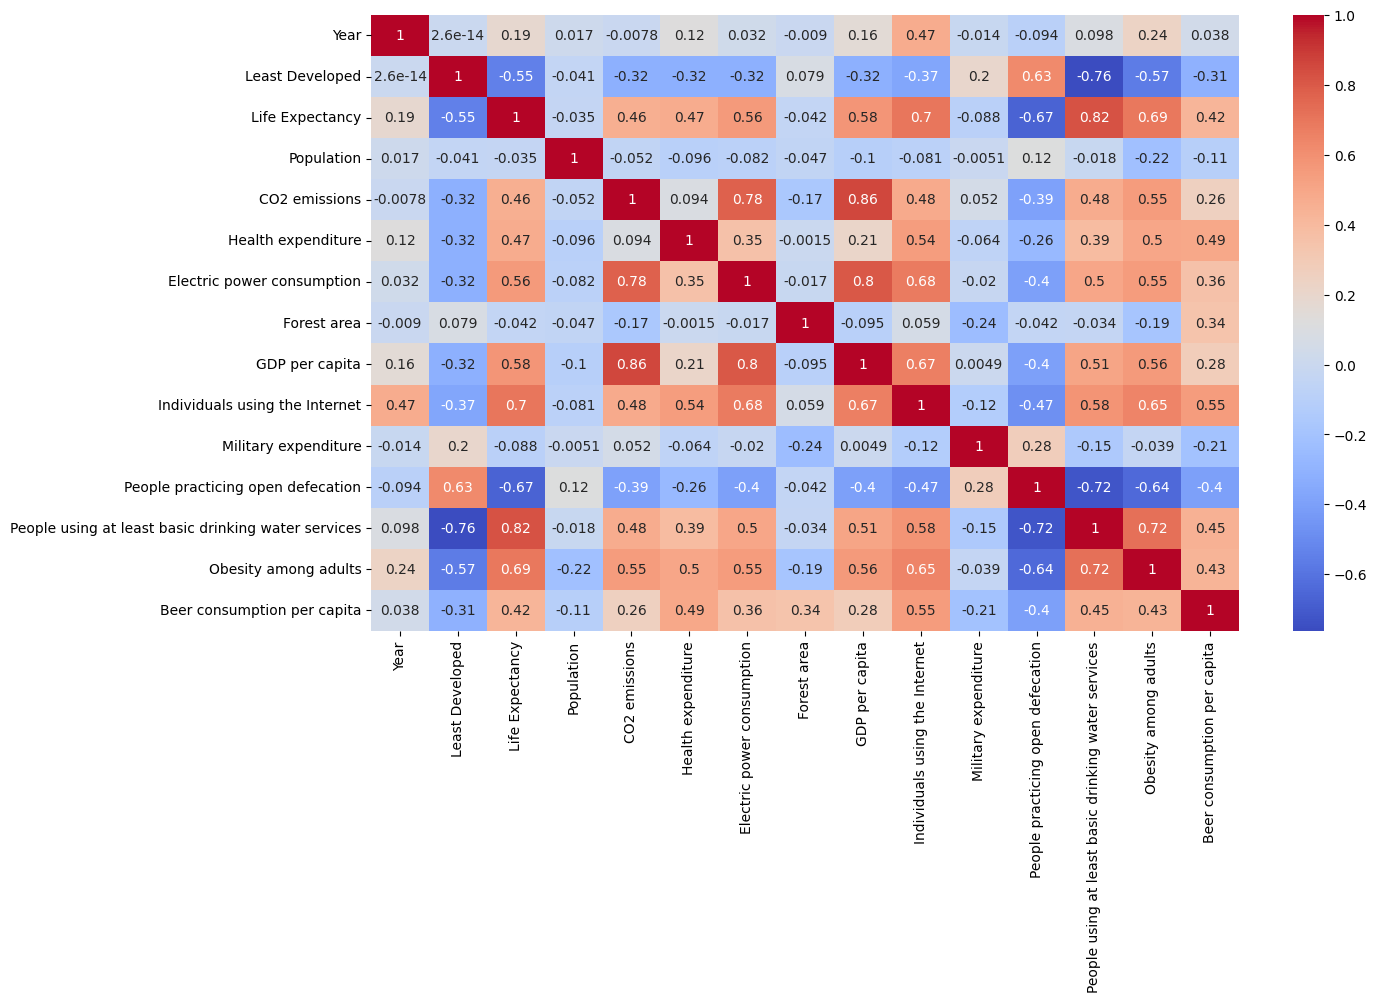

In [8]:
pylt.figure(figsize=(14,8))
sea.heatmap(df.corr(),annot=True,cmap='coolwarm')

In [9]:
# Copying DataFrame
df_map=df.copy()

In [10]:
# Removing Duplicates in Countries Column
df_map=df_map.drop_duplicates(subset=['Country'],keep='first')

## <font style="font-family:cambria"><u>Heat Map of Life Expectancy by Countries</u>

In [11]:
fig=px.choropleth(df_map,locations="Country",locationmode='country names',color="Life Expectancy",hover_name="Country",range_color=[0,100])
fig.update_layout(title_text='Life Expectancy by Country',title_x = 0.5)
fig.show()

## <font style="font-family:cambria"><u>Development of a Country VS Life Expectancy Graph</u> 

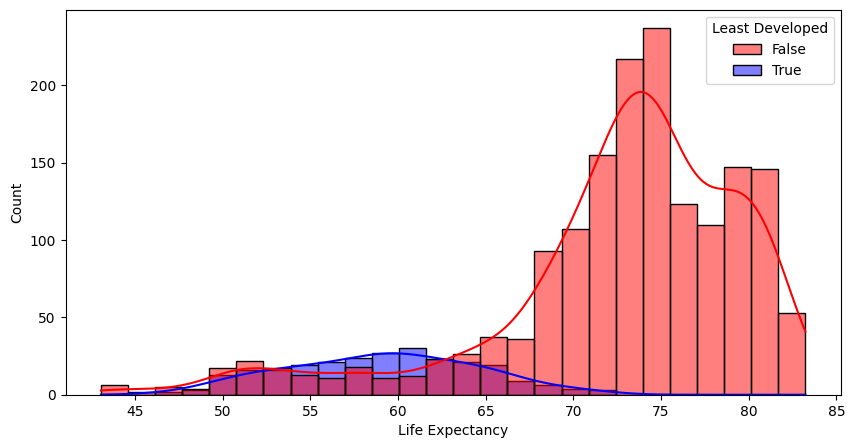

In [12]:
pylt.figure(figsize=(10,5))
palette=['red','blue']
sea.histplot(x='Life Expectancy',hue= 'Least Developed',data= df,palette=palette,kde=True);

<AxesSubplot: xlabel='Least Developed', ylabel='Life Expectancy'>

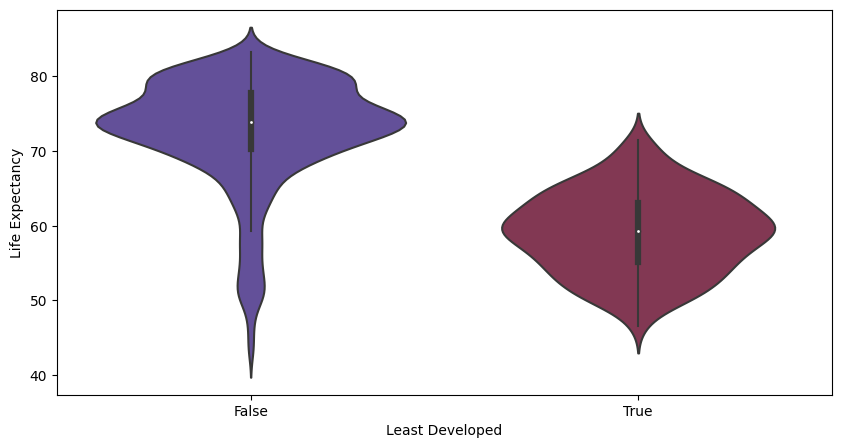

In [13]:
pylt.figure(figsize=(10,5))
sea.violinplot(x='Least Developed',y='Life Expectancy',data=df,palette='twilight')

#### <font style="font-family:cambria">↳ We can see from the graph, Life Expectancy of developed countries are Higher than Developing Countries.

## <font style="font-family:cambria"><u>Population VS Life Expectancy Bubble Chart</u>

In [14]:
fig=px.scatter(df_map,x="Population",y="Life Expectancy",color="Least Developed",size='Population',hover_name="Country",log_x=True,size_max=60)
fig.update_layout(title_text='Population vs Life Expectancy',title_x=0.5)
fig.show()

#### <font style="font-family:cambria">↳ We can see that Life Expectancy of Developing Countries Decreases by Increasing of Population and Life Expectancy of Developed Countries Increases by Increasing of Population.

## <font style="font-family:cambria"><u>Trend of Life Expectancy over the Years</u>

<AxesSubplot: xlabel='Year', ylabel='Life Expectancy'>

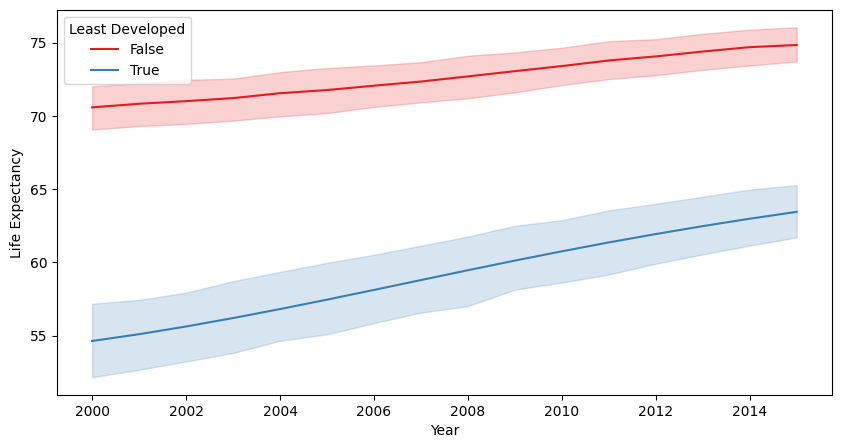

In [15]:
pylt.figure(figsize=(10,5))
sea.lineplot(x='Year',y='Life Expectancy',hue='Least Developed',data=df,palette='Set1')

In [16]:
fig=px.line(df.sort_values(by='Year'),x='Year',y='Life Expectancy',animation_frame='Country',animation_group='Year',color='Country',markers=True,template='plotly_dark',title='<b> Country wise Life Expectancy over Years')
fig.show()

#### <font style="font-family:cambria">↳ We can see in the line chart, the Life Expectancy is Increasing over the years for the Countries.


## <font style="font-family:cambria"><u>Air Quality (CO</u><sub>2</sub><u> Emission) VS Life Expectancy Bubble Chart</u>

In [17]:
fig=px.scatter(df_map,x="CO2 emissions",y="Life Expectancy",color="Least Developed",size='CO2 emissions',hover_name="Country",log_x=True,size_max=60)
fig.update_layout(title_text='CO2 emissions vs Life Expectancy',title_x=0.5)
fig.show()

#### <font style="font-family:cambria">↳ We can see that although CO<sub>2</sub> emissions come from countries with highest petroleum industry, But it actually has an effect on Life Expectancy.

# <font style="font-family:cambria"><u>GDP VS Life Expectancy Scatter Plot</u>

<AxesSubplot: xlabel='GDP per capita', ylabel='Life Expectancy'>

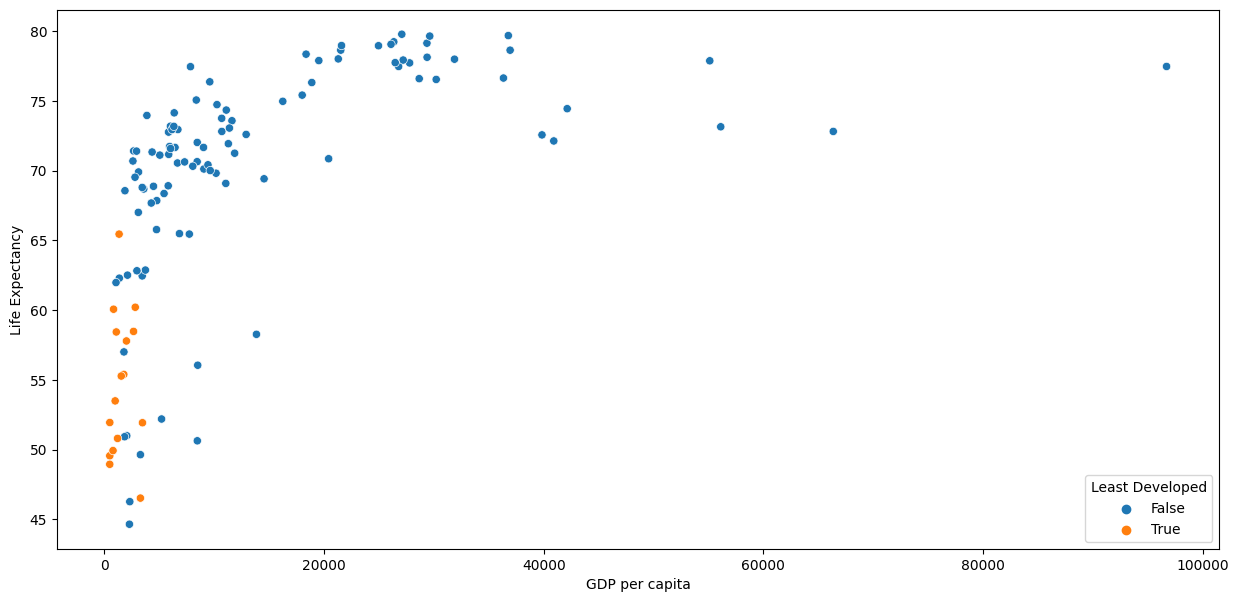

In [18]:
pylt.figure(figsize=(15,7))
sea.scatterplot(x='GDP per capita',y='Life Expectancy',hue='Least Developed',data=df_map)

#### <font style="font-family:cambria">↳ We can see that Life Expectancy is Directly Proportional to Country's GDP.


# <font style="font-family:cambria"><u>Obesity VS Life Expectancy Joint Plot</u>


<Figure size 1500x500 with 0 Axes>

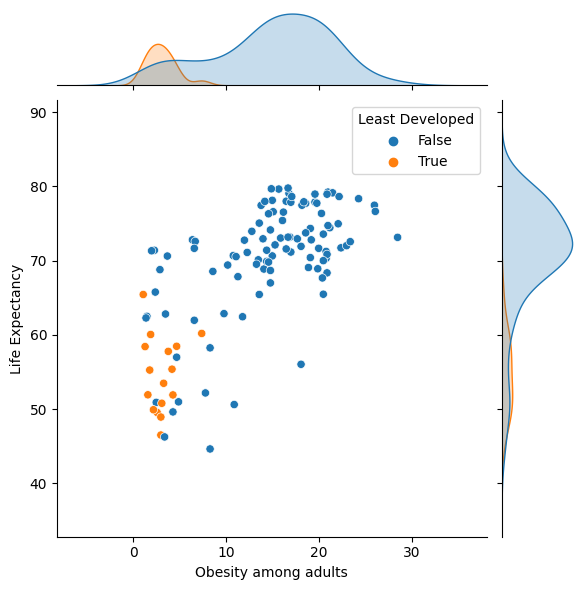

In [19]:
pylt.figure(figsize=(15,5))
sea.jointplot(x='Obesity among adults',y='Life Expectancy', hue='Least Developed', data=df_map, palette = 'tab10');

# <font style="font-family:cambria"><u>Drinking Water Service VS Life Expectancy Scatter Plot</u>

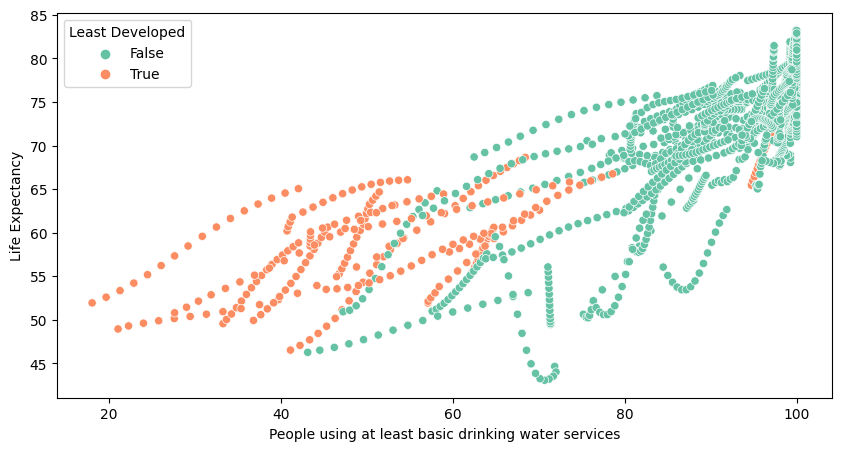

In [20]:
pylt.figure(figsize=(10,5))
sea.scatterplot(x='People using at least basic drinking water services', y='Life Expectancy', hue='Least Developed', data=df, palette = 'Set2');

#### <font style="font-family:cambria">↳ We can see that Life Expextancy is High in the countries where Drinking Water Service is Good.

# <b>5 <span style='color:#4285f4'>|</span><font style="font-family:cambria"> Machine Learning (ML) Models </b>

In [21]:
# Encoding Data
le=LabelEncoder()
df['Country']=le.fit_transform(df['Country'])
df['Least Developed']=le.fit_transform(df['Least Developed'])
df['Continent']=le.fit_transform(df['Continent'])

In [22]:
# Splitting Data
X=df.drop(['Life Expectancy'],axis=1)
y=df['Life Expectancy']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [23]:
# Scaling the Data by Using Robust Scaler
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [24]:
#Table of Models and their Scores
from prettytable import PrettyTable
x=PrettyTable()
x.field_names=["Model","Train Score","Test Score","R2 Score","Mean Absolute Error","Mean Squared Error"]

# <font style="font-family:cambria"><u> Linear Regression </u></b>

In [25]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_train_score = lr.score(X_train, y_train)
lr_test_score = lr.score(X_test, y_test)
lr_r2_score = r2_score(y_test, lr.predict(X_test))
lr_mae = mean_absolute_error(y_test, lr.predict(X_test))
lr_mse = mean_squared_error(y_test, lr.predict(X_test))
x.add_row(["Linear Regression", lr_train_score, lr_test_score, lr_r2_score, lr_mae, lr_mse])

print(x)

+-------------------+-------------------+--------------------+--------------------+---------------------+--------------------+
|       Model       |    Train Score    |     Test Score     |      R2 Score      | Mean Absolute Error | Mean Squared Error |
+-------------------+-------------------+--------------------+--------------------+---------------------+--------------------+
| Linear Regression | 0.831046814750498 | 0.8173151896848815 | 0.8173151896848815 |  2.7533436316231428 | 12.547768168640376 |
+-------------------+-------------------+--------------------+--------------------+---------------------+--------------------+


# <font style="font-family:cambria"><u> Lasso Regression </u></b>

In [26]:
lasso=Lasso()
lasso.fit(X_train,y_train)
lasso_train_score=lasso.score(X_train,y_train)
lasso_test_score=lasso.score(X_test,y_test)
lasso_r2_score=r2_score(y_test, lasso.predict(X_test))
lasso_mae=mean_absolute_error(y_test,lasso.predict(X_test))
lasso_mse=mean_squared_error(y_test,lasso.predict(X_test))
x.add_row(["Lasso Regression",lasso_train_score,lasso_test_score,lasso_r2_score,lasso_mae,lasso_mse])

print(x)

+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|       Model       |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error | Mean Squared Error |
+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
| Linear Regression | 0.831046814750498  | 0.8173151896848815 | 0.8173151896848815 |  2.7533436316231428 | 12.547768168640376 |
|  Lasso Regression | 0.7529582439824193 | 0.7427415711583469 | 0.7427415711583469 |  3.0326232581533974 | 17.669882454735145 |
+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+


# <font style="font-family:cambria"><u> Ridge Regression </u></b>

In [27]:
ridge = Ridge()
ridge.fit(X_train, y_train)
ridge_train_score = ridge.score(X_train, y_train)
ridge_test_score = ridge.score(X_test, y_test)
ridge_r2_score = r2_score(y_test, ridge.predict(X_test))
ridge_mae = mean_absolute_error(y_test, ridge.predict(X_test))
ridge_mse = mean_squared_error(y_test, ridge.predict(X_test))
x.add_row(["Ridge Regression", ridge_train_score, ridge_test_score, ridge_r2_score, ridge_mae, ridge_mse])

print(x)

+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|       Model       |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error | Mean Squared Error |
+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
| Linear Regression | 0.831046814750498  | 0.8173151896848815 | 0.8173151896848815 |  2.7533436316231428 | 12.547768168640376 |
|  Lasso Regression | 0.7529582439824193 | 0.7427415711583469 | 0.7427415711583469 |  3.0326232581533974 | 17.669882454735145 |
|  Ridge Regression | 0.8310400004169732 | 0.8173671527659268 | 0.8173671527659268 |  2.7519010507872212 | 12.544199066791359 |
+-------------------+--------------------+--------------------+--------------------+---------------------+--------------------+


# <font style="font-family:cambria"><u> Random Forest Regressor </u></b>

In [28]:
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_train_score = rfr.score(X_train, y_train)
rfr_test_score = rfr.score(X_test, y_test)
rfr_r2_score = r2_score(y_test, rfr.predict(X_test))
rfr_mae = mean_absolute_error(y_test, rfr.predict(X_test))
rfr_mse = mean_squared_error(y_test, rfr.predict(X_test))
x.add_row(["Random Forest Regressor", rfr_train_score, rfr_test_score, rfr_r2_score, rfr_mae, rfr_mse])

print(x)

+-------------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|          Model          |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error | Mean Squared Error |
+-------------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|    Linear Regression    | 0.831046814750498  | 0.8173151896848815 | 0.8173151896848815 |  2.7533436316231428 | 12.547768168640376 |
|     Lasso Regression    | 0.7529582439824193 | 0.7427415711583469 | 0.7427415711583469 |  3.0326232581533974 | 17.669882454735145 |
|     Ridge Regression    | 0.8310400004169732 | 0.8173671527659268 | 0.8173671527659268 |  2.7519010507872212 | 12.544199066791359 |
| Random Forest Regressor | 0.9981144219475393 | 0.9864734486276314 | 0.9864734486276314 |  0.6091116272637817 | 0.929075769621549  |
+-------------------------+--------------------+--------------

# <font style="font-family:cambria"><u> Decision Tree Regressor </u></b>

In [29]:
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_train_score = dtr.score(X_train, y_train)
dtr_test_score = dtr.score(X_test, y_test)
dtr_r2_score = r2_score(y_test, dtr.predict(X_test))
dtr_mae = mean_absolute_error(y_test, dtr.predict(X_test))
dtr_mse = mean_squared_error(y_test, dtr.predict(X_test))
x.add_row(["Decision Tree Regressor", dtr_train_score, dtr_test_score, dtr_r2_score, dtr_mae, dtr_mse])

print(x)

+-------------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|          Model          |    Train Score     |     Test Score     |      R2 Score      | Mean Absolute Error | Mean Squared Error |
+-------------------------+--------------------+--------------------+--------------------+---------------------+--------------------+
|    Linear Regression    | 0.831046814750498  | 0.8173151896848815 | 0.8173151896848815 |  2.7533436316231428 | 12.547768168640376 |
|     Lasso Regression    | 0.7529582439824193 | 0.7427415711583469 | 0.7427415711583469 |  3.0326232581533974 | 17.669882454735145 |
|     Ridge Regression    | 0.8310400004169732 | 0.8173671527659268 | 0.8173671527659268 |  2.7519010507872212 | 12.544199066791359 |
| Random Forest Regressor | 0.9981144219475393 | 0.9864734486276314 | 0.9864734486276314 |  0.6091116272637817 | 0.929075769621549  |
| Decision Tree Regressor |        1.0         | 0.97488742751

# <b>5.1 <span style='color:#4285f4'>|</span><font style="font-family:cambria"> Comparison Using Bar Graph </b>

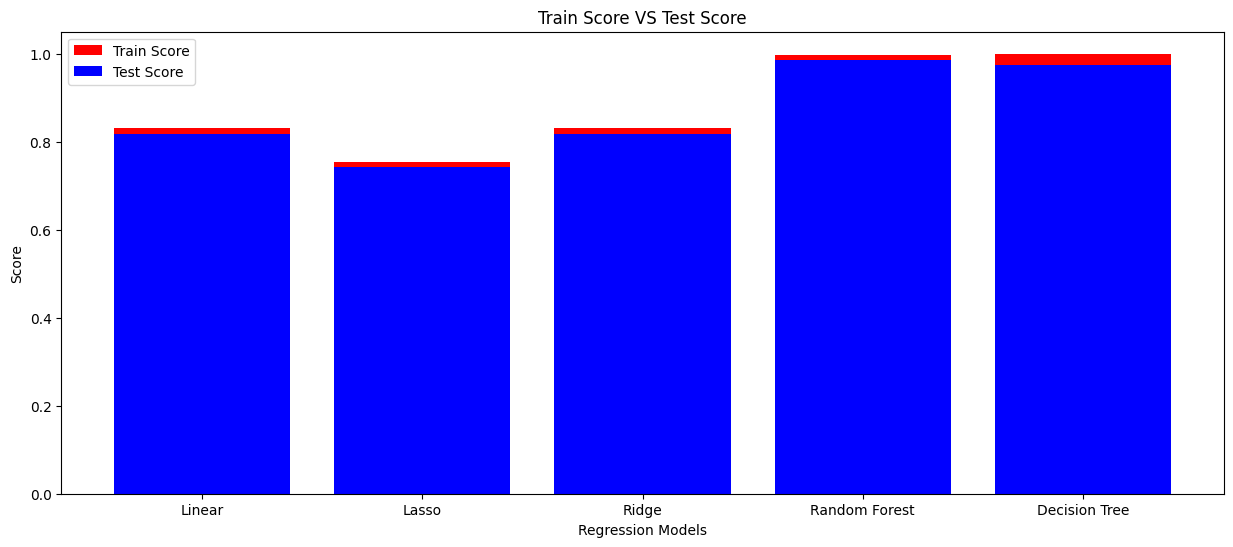

In [30]:
pylt.figure(figsize=(15,6))
pylt.bar(x=["Linear","Lasso","Ridge","Random Forest","Decision Tree"],height=[lr_train_score,lasso_train_score,ridge_train_score,rfr_train_score,dtr_train_score],color="red",label="Train Score")
pylt.bar(x=["Linear","Lasso","Ridge","Random Forest","Decision Tree"],height=[lr_test_score,lasso_test_score,ridge_test_score,rfr_test_score,dtr_test_score],color="blue",label="Test Score")
pylt.legend()
pylt.title("Train Score VS Test Score")
pylt.xlabel("Regression Models")
pylt.ylabel("Score")
pylt.show()